In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [2]:
def show(img, convert=False):
    if convert:
        plt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(plt_img)
    else:
        plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
qr_origin = cv2.imread('./test_pictures/qr-1.png')

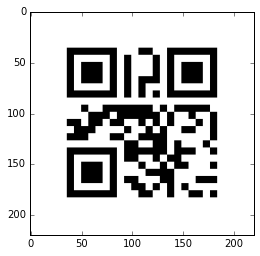

In [4]:
show(qr_origin)

In [5]:
qr_gray = cv2.cvtColor(qr_origin, cv2.COLOR_BGR2GRAY)

In [6]:
qr_gb = cv2.GaussianBlur(qr_gray, (5, 5), 0)

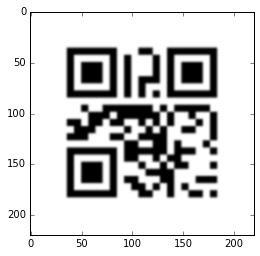

In [7]:
show(qr_gb)

In [8]:
edges_blured = cv2.Canny(qr_gb, 100, 200)

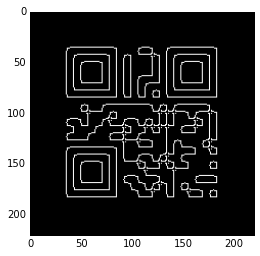

In [9]:
show(edges_blured)

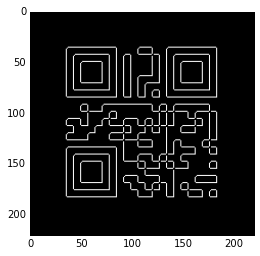

In [10]:
edges_origin = cv2.Canny(qr_origin, 100, 200)
show(edges_origin)

In [11]:
contours, hierarchy = cv2.findContours(edges_origin, cv2.RETR_TREE,
                                             cv2.CHAIN_APPROX_SIMPLE)

In [12]:
len(hierarchy)

1

In [13]:
len(hierarchy[0])

62

In [14]:
hierarchy = hierarchy[0]

In [15]:
len(contours)

62

In [16]:
found = []
for i in range(len(contours)):
    k = i
    c = 0
    while hierarchy[k][2] != -1:
        k = hierarchy[k][2]
        c += 1
    if c >= 5:
        found.append(i)

In [17]:
found

[17, 48, 56]

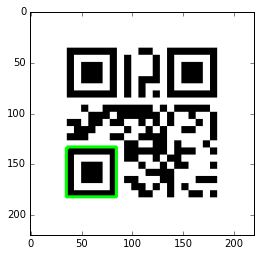

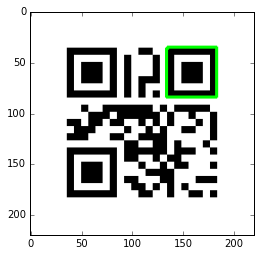

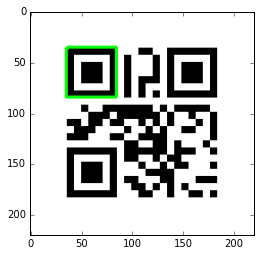

In [18]:
for i in found:
    qr_dc = qr_origin.copy()
    cv2.drawContours(qr_dc, contours, i, (0, 255, 0), 2)
    show(qr_dc)

In [19]:
for i in found:
    print contours[i][0]

[[ 37 133]]
[[135  35]]
[[37 35]]


In [20]:
contours_points = []
for i in found:
    c = contours[i]
    for sublist in c:
        for p in sublist:
            print p
            contours_points.append(p)

[ 37 133]
[ 35 135]
[ 35 181]
[ 36 182]
[ 84 182]
[ 84 134]
[ 83 133]
[135  35]
[133  37]
[133  83]
[134  84]
[182  84]
[182  36]
[181  35]
[37 35]
[35 37]
[35 83]
[36 84]
[84 84]
[84 36]
[83 35]


In [21]:
contours_points

[array([ 37, 133], dtype=int32),
 array([ 35, 135], dtype=int32),
 array([ 35, 181], dtype=int32),
 array([ 36, 182], dtype=int32),
 array([ 84, 182], dtype=int32),
 array([ 84, 134], dtype=int32),
 array([ 83, 133], dtype=int32),
 array([135,  35], dtype=int32),
 array([133,  37], dtype=int32),
 array([133,  83], dtype=int32),
 array([134,  84], dtype=int32),
 array([182,  84], dtype=int32),
 array([182,  36], dtype=int32),
 array([181,  35], dtype=int32),
 array([37, 35], dtype=int32),
 array([35, 37], dtype=int32),
 array([35, 83], dtype=int32),
 array([36, 84], dtype=int32),
 array([84, 84], dtype=int32),
 array([84, 36], dtype=int32),
 array([83, 35], dtype=int32)]

In [22]:
rect = cv2.minAreaRect(np.array(contours_points))

In [24]:
box = cv2.cv.BoxPoints(rect)

In [27]:
box = np.array(box)

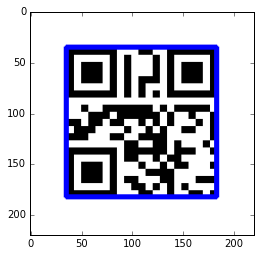

In [28]:
draw_img = qr_origin.copy()
cv2.polylines(draw_img, np.int32([box]), True, (0, 0, 255), 4)
show(draw_img)